In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import pickle
import joblib
import os

In [22]:
def load_model(model_path):
    with open(model_path, 'rb') as f:
        return pickle.load(f)

def load_dataset(folder_name):
    with open(f'../data/{folder_name}/train.pkl', 'rb') as f:
        X_train, y_train = pickle.load(f)
    with open(f'../data/{folder_name}/val.pkl', 'rb') as f:
        X_val, y_val = pickle.load(f)
    with open(f'../data/{folder_name}/test.pkl', 'rb') as f:
        X_test, y_test = pickle.load(f)

    scaler_y = None
    if folder_name in ['norm', 'hot_norm']:
        with open(f'../data/scaler_y.pkl', 'rb') as f:
            scaler_y = pickle.load(f)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler_y

In [23]:
file_name = '../data/knn_performances.csv'
perf_df = pd.read_csv(file_name)

# Define the regular expression pattern to extract k, weights, and metric
pattern = r'KNeighborsRegressor \(k=(\d+), weights=(\w+), metric=(\w+)\)'

# Extract the values using the pattern
perf_df[['k', 'weights', 'metric']] = perf_df['model'].str.extract(pattern)

# Convert the 'k' column to an integer type
perf_df['k'] = perf_df['k'].astype(int)

perf_df

,model,dataset,split,rmse,mae,r2,inversed,model_path,k,weights,metric
0,"KNeighborsRegressor (k=5, weights=uniform, met...",hot_norm,train,0.0616,0.0379,0.7644,False,../models/knn_5_neighbors_uniform_euclidean_ho...,5,uniform,euclidean
1,"KNeighborsRegressor (k=5, weights=uniform, met...",hot_norm,train,89.7294,55.2743,0.7644,True,../models/knn_5_neighbors_uniform_euclidean_ho...,5,uniform,euclidean
2,"KNeighborsRegressor (k=5, weights=uniform, met...",hot_norm,val,0.0777,0.0472,0.6258,False,../models/knn_5_neighbors_uniform_euclidean_ho...,5,uniform,euclidean
3,"KNeighborsRegressor (k=5, weights=uniform, met...",hot_norm,val,113.2998,68.8647,0.6258,True,../models/knn_5_neighbors_uniform_euclidean_ho...,5,uniform,euclidean
4,"KNeighborsRegressor (k=5, weights=uniform, met...",hot_norm,test,0.0774,0.0480,0.6346,False,../models/knn_5_neighbors_uniform_euclidean_ho...,5,uniform,euclidean
...,...,...,...,...,...,...,...,...,...,...,...
139,"KNeighborsRegressor (k=50, weights=distance, m...",hot_norm,train,0.0000,0.0000,1.0000,True,../models/knn_50_neighbors_distance_manhattan_...,50,distance,manhattan
140,"KNeighborsRegressor (k=50, weights=distance, m...",hot_norm,val,0.0749,0.0443,0.6526,False,../models/knn_50_neighbors_distance_manhattan_...,50,distance,manhattan
141,"KNeighborsRegressor (k=50, weights=distance, m...",hot_norm,val,109.1591,64.5386,0.6526,True,../models/knn_50_neighbors_distance_manhattan_...,50,distance,manhattan
142,"KNeighborsRegressor (k=50, weights=distance, m...",hot_norm,test,0.0738,0.0445,0.6675,False,../models/knn_50_neighbors_distance_manhattan_...,50,distance,manhattan


In [24]:
# Drop all rows where column 'split' = 'test'
perf_df = perf_df[perf_df['split'] != 'test']

# Ensure the 'split' column has a categorical type with the specified order
split_order = pd.CategoricalDtype(categories=['val', 'train'], ordered=True)
perf_df['split'] = perf_df['split'].astype(split_order)

# Split the DataFrame into inversed and non-inversed
inversed_df = perf_df[perf_df['inversed'] == True]
NOT_inversed_df = perf_df[perf_df['inversed'] == False]

/tmp/ipykernel_6052/2902005474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['split'] = perf_df['split'].astype(split_order)


# Mae

In [25]:
# Sort the DataFrame by 'split' and then by 'mae'
mae_sorted_df = inversed_df.sort_values(by=['split', 'mae'], ascending=[True, False])

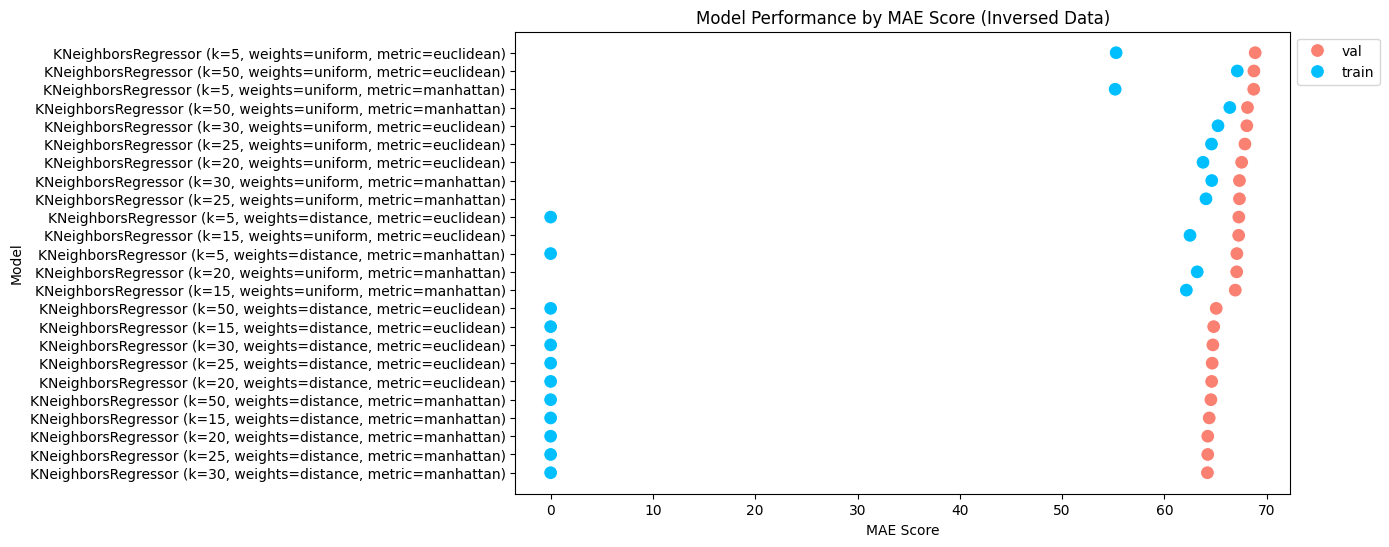

In [26]:
# Plot for Filtered Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mae_sorted_df, 
                y='model', 
                x='mae', 
                palette={'train': 'deepskyblue', 'val': 'salmon'},# Custom color palette
                marker='o',   # Circle markers
                s=100,        # Size of the markers
                hue='split'   # Color by split
                )  

# Adding plot title
plt.title('Model Performance by MAE Score (Inversed Data)')

# Adding x and y axis labels
plt.xlabel('MAE Score')
plt.ylabel('Model')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save plot
#plt.savefig('../plots/filtered_models_MAE.png')
# Display the plot
plt.show()


# R2

In [27]:
# Sort the DataFrame by 'split' and then by 'r2'
r2_sorted_df = inversed_df.sort_values(by=['split', 'r2'], ascending=[True, True])

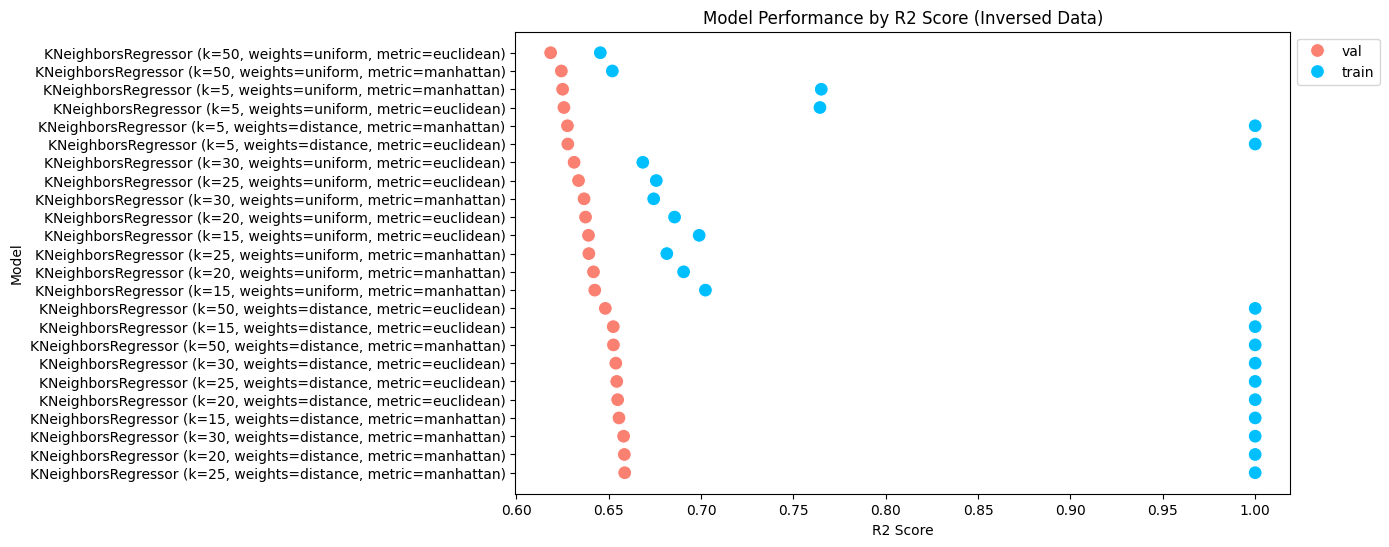

In [28]:
# Plot for Filtered Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=r2_sorted_df, 
                y='model', 
                x='r2', 
                palette={'train': 'deepskyblue', 'val': 'salmon'},# Custom color palette
                marker='o',   # Circle markers
                s=100,        # Size of the markers
                hue='split'   # Color by split
                )  

# Adding plot title
plt.title('Model Performance by R2 Score (Inversed Data)')

# Adding x and y axis labels
plt.xlabel('R2 Score')
plt.ylabel('Model')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save plot
#plt.savefig('../plots/filtered_models_R2.png')
# Display the plot
plt.show()


# RMSE

In [29]:
# Sort the DataFrame by 'split' and then by 'rmse'
rmse_sorted_df = inversed_df.sort_values(by=['split', 'rmse'], ascending=[True, False])

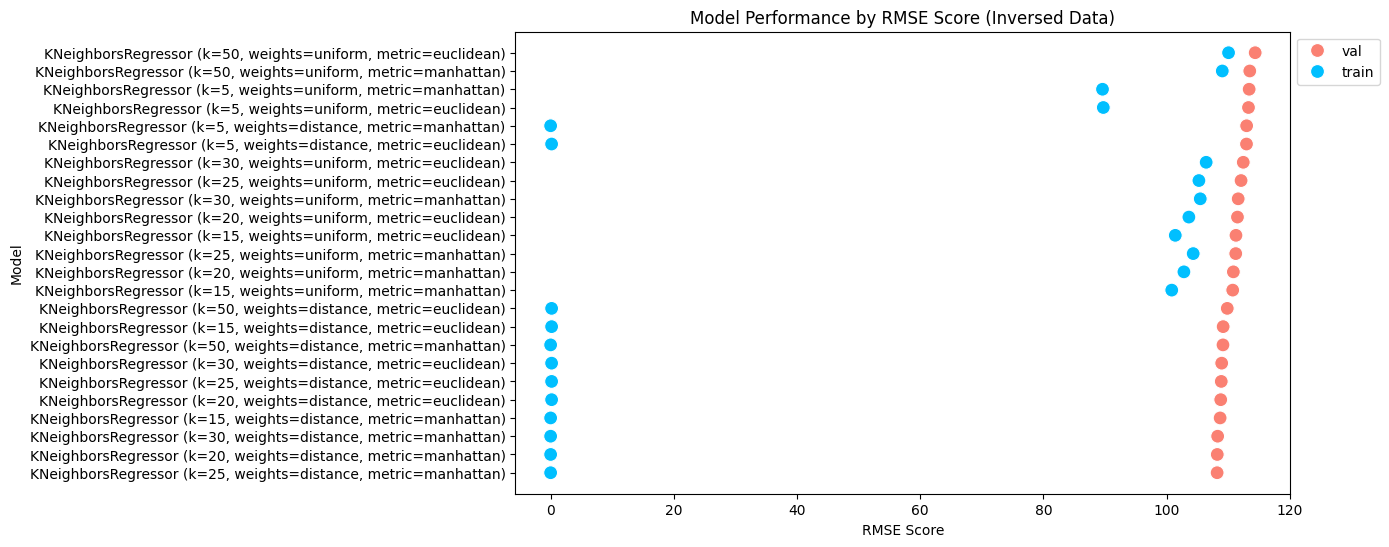

In [30]:
# Plot for Filtered Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rmse_sorted_df, 
                y='model', 
                x='rmse', 
                palette={'train': 'deepskyblue', 'val': 'salmon'},# Custom color palette
                marker='o',   # Circle markers
                s=100,        # Size of the markers
                hue='split'   # Color by split
                )  

# Adding plot title
plt.title('Model Performance by RMSE Score (Inversed Data)')

# Adding x and y axis labels
plt.xlabel('RMSE Score')
plt.ylabel('Model')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save plot
#plt.savefig('../plots/filtered_models_R2.png')
# Display the plot
plt.show()


# Performance over K

In [31]:
# keep only split = test
lineplot_df = inversed_df[inversed_df['split'] == 'val']

## Mae

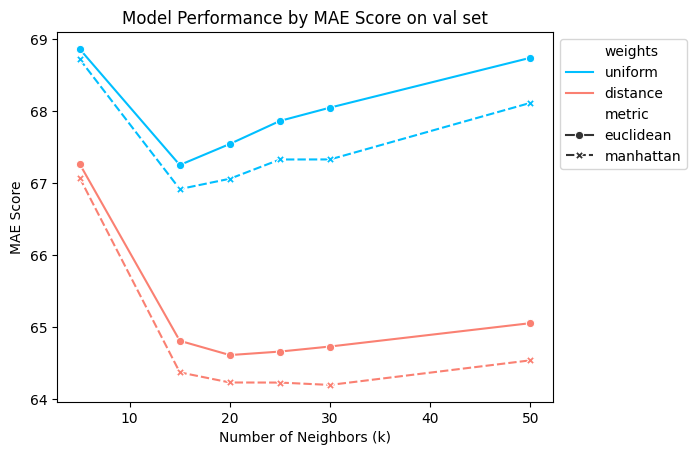

In [32]:
sns.lineplot(data=lineplot_df, x='k', y='mae', hue='weights', style='metric', markers=True, dashes=True, palette={'uniform': 'deepskyblue', 'distance': 'salmon'})
                
# Adding plot title
plt.title('Model Performance by MAE Score on val set')
# Adding x and y axis labels
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MAE Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## R2

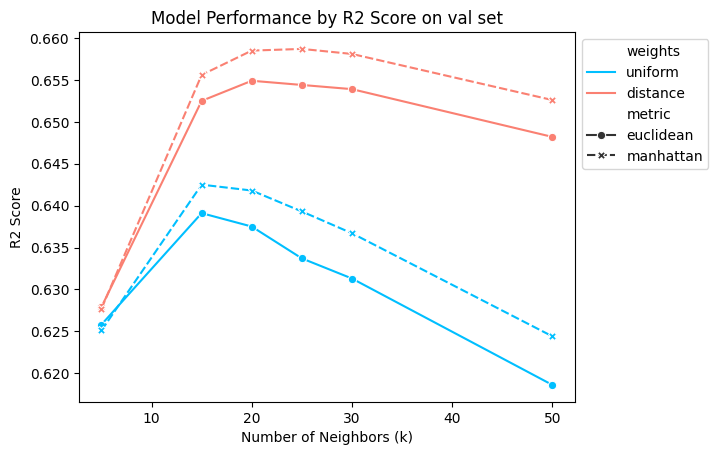

In [33]:
sns.lineplot(data=lineplot_df, x='k', y='r2', hue='weights', style='metric',markers=True, dashes=True, palette={'uniform': 'deepskyblue', 'distance': 'salmon'})
# Adding plot title
plt.title('Model Performance by R2 Score on val set')
# Adding x and y axis labels
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R2 Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## RMSE

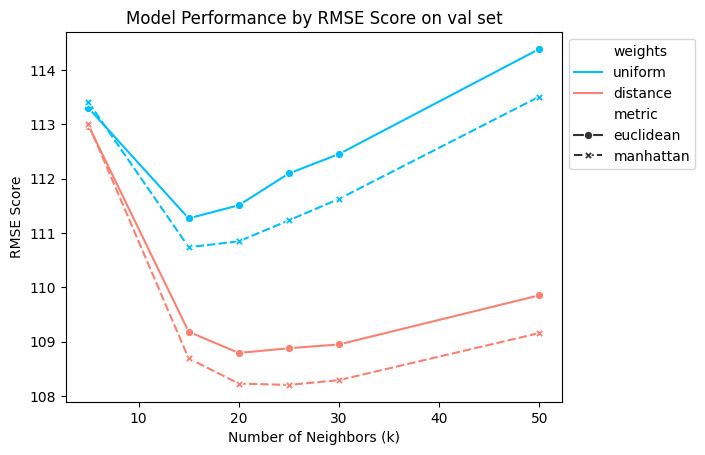

In [34]:
sns.lineplot(data=lineplot_df, x='k', y='rmse', hue='weights', style='metric',markers=True, dashes=True, palette={'uniform': 'deepskyblue', 'distance': 'salmon'})
# Adding plot title
plt.title('Model Performance by RMSE Score on val set')
# Adding x and y axis labels
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Best model

In [35]:
# Load knn model 20, distance, manhattan, hot_norm
best_model_path = '../models/knn_20_neighbors_distance_manhattan_hot_norm.pkl'
knn = load_model(best_model_path)
# Make predictions on test set
X_train, X_val, X_test, y_train, y_val, y_test, scaler_y = load_dataset('hot_norm')
preds = knn.predict(X_test)
# Inverse transform the predictions
preds_original = scaler_y.inverse_transform(preds.reshape(-1, 1)).flatten()
y_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

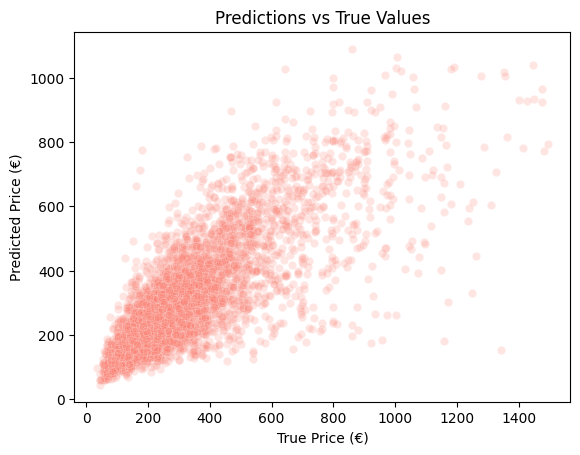

In [36]:
# Plot the predictions
sns.scatterplot(x=y_original, y=preds_original, color='salmon', alpha=0.2)
plt.xlabel('True Price (€)')
plt.ylabel('Predicted Price (€)')
plt.title('Predictions vs True Values')
plt.show()

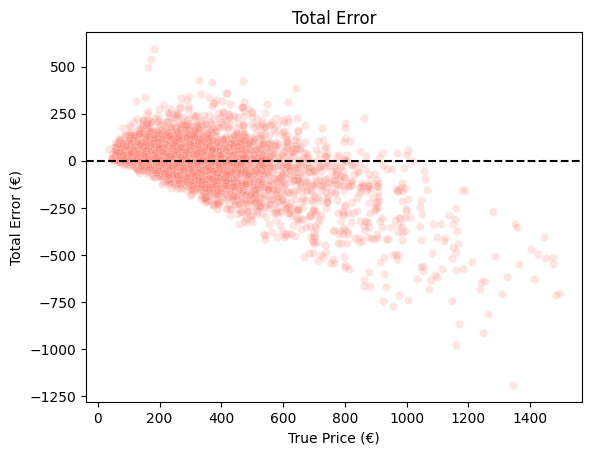

In [37]:
# Calculation of total error
total_error = preds_original - y_original

# Create scatter plot of predictions vs true values
sns.scatterplot(x=y_original, y=total_error, color='salmon', alpha=0.2)

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--')

# Set the title and labels of the plot
plt.title('Total Error')
plt.xlabel('True Price (€)')
plt.ylabel('Total Error (€)')

# Show the plot
plt.show()

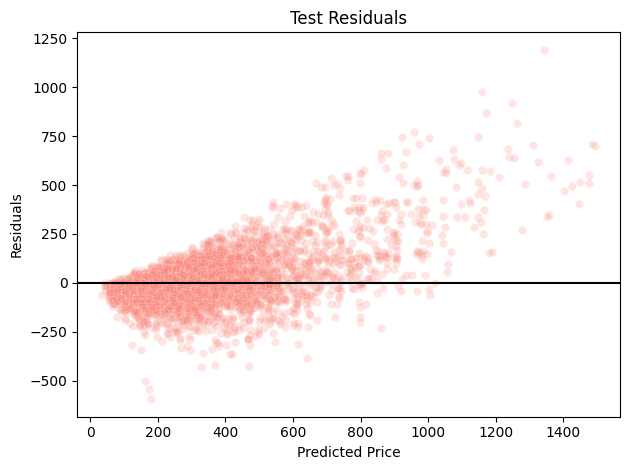

In [38]:

test_residuals = y_original - preds_original

sns.scatterplot(x=y_original, y=test_residuals, color='salmon', alpha=0.2)
plt.axhline(0, color='black')
plt.title('Test Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


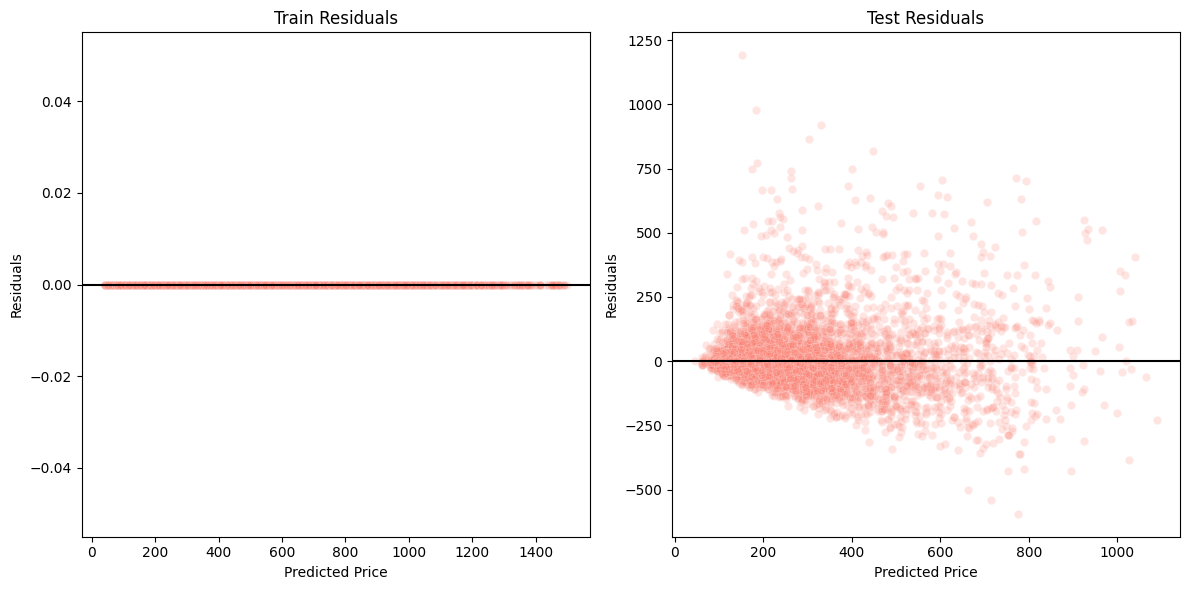

In [42]:
# Load knn model 20, distance, manhattan, hot_norm
best_model_path = '../models/knn_20_neighbors_distance_manhattan_hot_norm.pkl'
knn = load_model(best_model_path)

X_train, X_val, X_test, y_train, y_val, y_test, scaler_y = load_dataset('hot_norm')
# Make predictions on test set
y_train_pred = knn.predict(X_train)
# Inverse transform train predictions and true values
y_train_pred = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
y_train =      scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
# Calculate residuals for train set
train_residuals = y_train - y_train_pred

# Make predictions on test set
y_test_pred = knn.predict(X_test)
# Inverse transform test predictions and true values
y_test_pred = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test =      scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
# Calculate residuals for test set
test_residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=train_residuals, color='salmon', alpha=0.2)
plt.axhline(0, color='black')
plt.title('Train Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=test_residuals, color='salmon', alpha=0.2)
plt.axhline(0, color='black')
plt.title('Test Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
file_name = '../data/knn_performances.csv'
perf_df = pd.read_csv(file_name)
best_df = perf_df[perf_df['model_path']==best_model_path]
best_df

,model,dataset,split,rmse,mae,r2,inversed,model_path
66,"KNeighborsRegressor (k=20, weights=distance, m...",hot_norm,train,0.0000,0.0000,1.0000,False,../models/knn_20_neighbors_distance_manhattan_...
67,"KNeighborsRegressor (k=20, weights=distance, m...",hot_norm,train,0.0000,0.0000,1.0000,True,../models/knn_20_neighbors_distance_manhattan_...
68,"KNeighborsRegressor (k=20, weights=distance, m...",hot_norm,val,0.0743,0.0441,0.6585,False,../models/knn_20_neighbors_distance_manhattan_...
69,"KNeighborsRegressor (k=20, weights=distance, m...",hot_norm,val,108.2298,64.2307,0.6585,True,../models/knn_20_neighbors_distance_manhattan_...
70,"KNeighborsRegressor (k=20, weights=distance, m...",hot_norm,test,0.0733,0.0444,0.6719,False,../models/knn_20_neighbors_distance_manhattan_...
71,"KNeighborsRegressor (k=20, weights=distance, m...",hot_norm,test,106.8529,64.7234,0.6719,True,../models/knn_20_neighbors_distance_manhattan_...
